In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=8f230ac19d100cb0289ac7fe534fb55b84c3285a51291530d21f26f0b09ed91e
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
!pip install pytorch-model-summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
import pickle

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from torchsummary import summary

In [ ]:
from pytorch_model_summary import summary

In [ ]:
# embeddings_balanced_b_path = 'drive/MyDrive/DataBank/wordEmbedding/binary/balanced/em_1.csv'
# embeddings_balanced_b_path_im = 'drive/MyDrive/DataBank/wordEmbedding/binary/imbalanced/em_1.csv'

embeddings_balanced_b_path = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/binary/balanced/em_1.csv'
embeddings_balanced_b_path_im = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/binary/imbalanced/em_1.csv'

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)


In [ ]:
dataset_b.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,label
0,0,-0.133892,-0.086438,-0.840741,0.062779,0.016195,0.172234,-0.182799,-0.069002,0.018745,...,-0.183682,0.030514,0.036510,0.038916,-0.071479,-0.238434,-0.260483,0.070445,0.030813,0.0
1,1,-0.188432,-0.149177,-1.233576,0.011452,-0.073524,-0.475166,-0.013268,-0.119975,0.011281,...,-0.089172,0.039796,-0.099624,0.080897,-0.203350,-0.073006,-0.066492,0.072095,0.020170,0.0
2,2,-0.047692,0.036650,-1.295612,0.060952,-0.011443,-0.433142,0.055753,0.248110,-0.000550,...,-0.015982,-0.004570,-0.000296,0.058240,-0.132504,-0.051032,-0.010782,0.046710,-0.124802,0.0
3,3,0.043352,-0.030177,-1.217273,0.054127,-0.148160,-0.655529,0.044607,-0.086353,0.122969,...,-0.072555,0.128985,-0.018337,0.023553,-0.123336,-0.047913,0.074811,0.058537,-0.159469,0.0
4,4,-0.106378,-0.126635,-1.558088,-0.065692,-0.073381,-0.502073,0.124153,-0.086054,0.075162,...,-0.031166,-0.026440,-0.070068,-0.040526,-0.197655,-0.137533,-0.003336,0.104951,-0.069686,0.0


In [ ]:
plt_data_balanced = []
plt_data_imbalanced = []
plt_ROC_balanced = []
plt_ROC_imbalanced = []

In [ ]:
import sys
import numpy as np

def predictive_entropy(predictions):
    epsilon = sys.float_info.min
    predictive_entropy = -np.sum( np.mean(predictions, axis=0) * np.log(np.mean(predictions, axis=0) + epsilon),
            axis=-1)

    return predictive_entropy

#Balanced Dataset

#UNI - Directional

Adam

dataset_b.shape: 15800 768
Iteration: 1000. Loss: 0.5301329493522644. Accuracy: 70.75949% F1: 75.13% cohen_kappa: 0.4169
Iteration: 2000. Loss: 0.5275291800498962. Accuracy: 76.23418% F1: 76.18% cohen_kappa: 0.5247
Iteration: 3000. Loss: 0.3333660960197449. Accuracy: 76.93038% F1: 77.28% cohen_kappa: 0.5388
Iteration: 4000. Loss: 0.46833309531211853. Accuracy: 77.87975% F1: 77.65% cohen_kappa: 0.5575
Iteration: 5000. Loss: 0.5661208629608154. Accuracy: 77.78481% F1: 77.76% cohen_kappa: 0.5557
Iteration: 6000. Loss: 0.5042661428451538. Accuracy: 78.10127% F1: 78.29% cohen_kappa: 0.5621
Iteration: 7000. Loss: 0.6599291563034058. Accuracy: 78.19620% F1: 76.99% cohen_kappa: 0.5636
Iteration: 8000. Loss: 0.48770102858543396. Accuracy: 77.37342% F1: 77.18% cohen_kappa: 0.5474
Uncertainity: 0.69314194


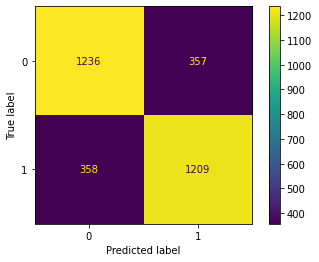

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.shape)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # print(images.shape)

        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):
                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-UNI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','Adam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15800 768
Iteration: 1000. Loss: 0.6975252628326416. Accuracy: 73.79747% F1: 75.18% cohen_kappa: 0.4765
Iteration: 2000. Loss: 0.6491034030914307. Accuracy: 75.03165% F1: 76.43% cohen_kappa: 0.5012
Iteration: 3000. Loss: 0.5434988141059875. Accuracy: 76.23418% F1: 74.02% cohen_kappa: 0.5240
Iteration: 4000. Loss: 0.5568849444389343. Accuracy: 77.05696% F1: 77.70% cohen_kappa: 0.5414
Iteration: 5000. Loss: 0.4887060225009918. Accuracy: 75.75949% F1: 78.51% cohen_kappa: 0.5162
Iteration: 6000. Loss: 0.6996830701828003. Accuracy: 76.77215% F1: 78.96% cohen_kappa: 0.5363
Iteration: 7000. Loss: 0.5096630454063416. Accuracy: 77.15190% F1: 79.13% cohen_kappa: 0.5438
Iteration: 8000. Loss: 0.35888752341270447. Accuracy: 78.92405% F1: 77.58% cohen_kappa: 0.5781
Uncertainity: 0.6867528


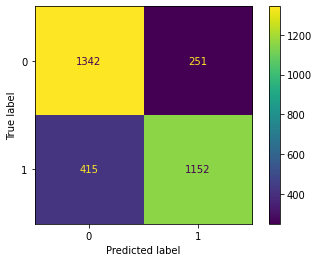

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):
                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)


            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-UNI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','NAdam'))



uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15800 768
Iteration: 1000. Loss: 0.5444342494010925. Accuracy: 71.80380% F1: 73.99% cohen_kappa: 0.4369
Iteration: 2000. Loss: 0.4612327218055725. Accuracy: 74.46203% F1: 74.03% cohen_kappa: 0.4891
Iteration: 3000. Loss: 0.5465962886810303. Accuracy: 76.29747% F1: 74.65% cohen_kappa: 0.5255
Iteration: 4000. Loss: 0.48274725675582886. Accuracy: 77.97468% F1: 78.09% cohen_kappa: 0.5596
Iteration: 5000. Loss: 0.4878980219364166. Accuracy: 72.46835% F1: 76.87% cohen_kappa: 0.4511
Iteration: 6000. Loss: 0.6231037378311157. Accuracy: 78.13291% F1: 79.47% cohen_kappa: 0.5632
Iteration: 7000. Loss: 0.46171531081199646. Accuracy: 78.73418% F1: 77.97% cohen_kappa: 0.5745
Iteration: 8000. Loss: 0.5057450532913208. Accuracy: 78.13291% F1: 79.55% cohen_kappa: 0.5632
Uncertainity: 0.6832002


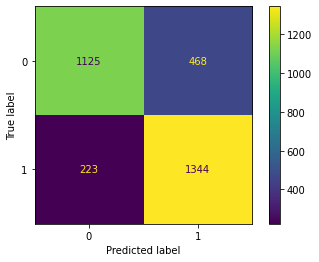

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):
                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)


            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-UNI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','RAdam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 15800 768
Iteration: 1000. Loss: 0.5564290285110474. Accuracy: 73.25949% F1: 74.48% cohen_kappa: 0.4656
Iteration: 2000. Loss: 0.5599603652954102. Accuracy: 73.76582% F1: 69.49% cohen_kappa: 0.4741
Iteration: 3000. Loss: 0.5282825827598572. Accuracy: 76.80380% F1: 77.71% cohen_kappa: 0.5364
Iteration: 4000. Loss: 0.41252169013023376. Accuracy: 76.29747% F1: 78.33% cohen_kappa: 0.5267
Iteration: 5000. Loss: 0.3957180976867676. Accuracy: 77.81646% F1: 78.30% cohen_kappa: 0.5565
Iteration: 6000. Loss: 0.5098022818565369. Accuracy: 78.03797% F1: 79.06% cohen_kappa: 0.5611
Iteration: 7000. Loss: 0.46196097135543823. Accuracy: 77.68987% F1: 75.75% cohen_kappa: 0.5532
Iteration: 8000. Loss: 0.5133749842643738. Accuracy: 77.50000% F1: 78.09% cohen_kappa: 0.5502
Uncertainity: 0.6893613


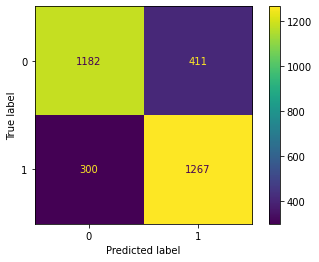

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=batch_size,
                                        shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=batch_size,
                                        shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.dropout = nn.Dropout(.1)
      self.softmax = nn.Softmax(dim=1)


  def forward(self, x):
      # set initial hidden and cell states
      # print('x size:',x.size(0))
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

      # print('before:',images.shape)

      images = images.reshape(batch_size, sequence_length, input_size).to(device)

      # print('after:',images.shape)

      labels = labels.to(device)

      # Clear gradients w.r.t. parameters
      optimizer.zero_grad()

      # Forward pass to get output/logits
      outputs = model(images.float())


      # Calculate Loss: softmax --> cross entropy loss
      loss = criterion(outputs, labels)

      # Getting gradients w.r.t. parameters
      loss.backward()

      # Updating parameters
      optimizer.step()

      iter += 1
      if iter % check_acc_iter == 0:
          # Calculate Accuracy
          correct = 0
          total = 0
          y_pred = []
          y_true = []
          pos_probs = []
          neg_probs = []
          # Iterate through test dataset
          for i_model, (images, labels) in enumerate(test_loader):

              images = images.reshape(batch_size, sequence_length, input_size).to(device)

              # Forward pass only to get logits/output
              outputs = model(images.float())

              np_output = outputs.detach().cpu().numpy()

              if i_model == 0:
                  predictions = np_output
              else:
                  predictions = np.vstack((predictions, np_output))

              pos_probs.extend(outputs[:,0].tolist())
              neg_probs.extend(outputs[:,1].tolist())

              # Get predictions from the maximum value
              _, predicted = torch.max(outputs, 1)

              # Total number of labels
              total += labels.size(0)

              y_pred.extend(predicted.tolist())
              y_true.extend(labels.tolist())

              # Total correct predictions
              if torch.cuda.is_available():
                  correct += (predicted.cpu() == labels.cpu()).sum()
              else:
                  correct += (predicted == labels).sum()

          accuracy = 100 * correct.item() / total
          f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
          cohen_kappa = cohen_kappa_score(y_true, y_pred)

          if mx_acc < accuracy:
            mx_acc = accuracy
            y_score_pos = pos_probs
            y_score_neg = neg_probs

          # Print Loss
          print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
          plt_data_balanced.append(('LSTM-BI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','Adam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15800 768
Iteration: 1000. Loss: 0.5467051863670349. Accuracy: 74.33544% F1: 75.22% cohen_kappa: 0.4870
Iteration: 2000. Loss: 0.3545605540275574. Accuracy: 75.85443% F1: 76.79% cohen_kappa: 0.5174
Iteration: 3000. Loss: 0.7362944483757019. Accuracy: 77.50000% F1: 76.56% cohen_kappa: 0.5497
Iteration: 4000. Loss: 0.6099779605865479. Accuracy: 77.37342% F1: 77.62% cohen_kappa: 0.5476
Iteration: 5000. Loss: 0.4372478425502777. Accuracy: 77.34177% F1: 77.28% cohen_kappa: 0.5468
Iteration: 6000. Loss: 0.35329434275627136. Accuracy: 77.68987% F1: 78.35% cohen_kappa: 0.5541
Iteration: 7000. Loss: 0.6465718746185303. Accuracy: 77.53165% F1: 75.70% cohen_kappa: 0.5501
Iteration: 8000. Loss: 0.46316131949424744. Accuracy: 77.84810% F1: 77.83% cohen_kappa: 0.5570
Uncertainity: 0.6931354


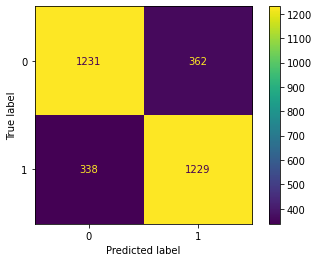

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_BI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
        # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

        self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):
                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)



            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-BI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','NAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15800 768
Iteration: 1000. Loss: 0.6006320118904114. Accuracy: 72.68987% F1: 68.56% cohen_kappa: 0.4527
Iteration: 2000. Loss: 0.7960847020149231. Accuracy: 68.41772% F1: 74.67% cohen_kappa: 0.3710
Iteration: 3000. Loss: 0.3679412007331848. Accuracy: 72.02532% F1: 76.24% cohen_kappa: 0.4422
Iteration: 4000. Loss: 0.872042179107666. Accuracy: 77.15190% F1: 75.72% cohen_kappa: 0.5426
Iteration: 5000. Loss: 0.4293346405029297. Accuracy: 77.15190% F1: 77.77% cohen_kappa: 0.5433
Iteration: 6000. Loss: 0.4473798871040344. Accuracy: 77.37342% F1: 76.70% cohen_kappa: 0.5473
Iteration: 7000. Loss: 0.4496937394142151. Accuracy: 77.94304% F1: 76.76% cohen_kappa: 0.5585
Iteration: 8000. Loss: 0.5816265344619751. Accuracy: 78.10127% F1: 77.91% cohen_kappa: 0.5620
Uncertainity: 0.6929004


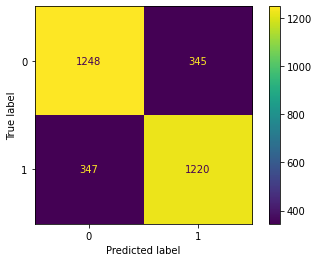

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_BI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
        # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

        self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):
                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-BI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','RAdam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#Imbalaned Dataset

#UNI - Directional

Adam


dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.49896708130836487. Accuracy: 75.29781% F1: 73.36% cohen_kappa: 0.5043
Iteration: 2000. Loss: 0.6190358996391296. Accuracy: 76.23824% F1: 74.44% cohen_kappa: 0.5232
Iteration: 3000. Loss: 0.3921266794204712. Accuracy: 71.41066% F1: 61.97% cohen_kappa: 0.4202
Iteration: 4000. Loss: 0.6465598344802856. Accuracy: 77.42947% F1: 77.93% cohen_kappa: 0.5496
Iteration: 5000. Loss: 0.41611748933792114. Accuracy: 77.89969% F1: 76.71% cohen_kappa: 0.5570
Iteration: 6000. Loss: 0.6249633431434631. Accuracy: 77.71160% F1: 77.04% cohen_kappa: 0.5539
Iteration: 7000. Loss: 0.4581395983695984. Accuracy: 77.39812% F1: 78.16% cohen_kappa: 0.5493
Iteration: 8000. Loss: 0.4706864356994629. Accuracy: 77.61755% F1: 78.32% cohen_kappa: 0.5536
Uncertainity: 0.6895604


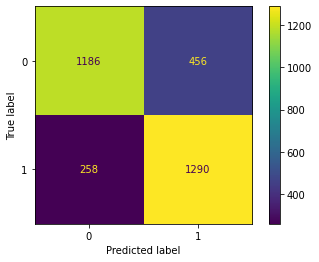

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):
                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
                mx_acc = accuracy
                y_score_pos = pos_probs
                y_score_neg = neg_probs
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-UNI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','Adam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.4171055257320404. Accuracy: 74.82759% F1: 72.71% cohen_kappa: 0.4947
Iteration: 2000. Loss: 0.4323880672454834. Accuracy: 74.76489% F1: 73.12% cohen_kappa: 0.4939
Iteration: 3000. Loss: 0.42284756898880005. Accuracy: 76.73981% F1: 74.64% cohen_kappa: 0.5329
Iteration: 4000. Loss: 0.6978754997253418. Accuracy: 76.73981% F1: 77.50% cohen_kappa: 0.5361
Iteration: 5000. Loss: 0.6356895565986633. Accuracy: 74.85893% F1: 70.56% cohen_kappa: 0.4933
Iteration: 6000. Loss: 0.5911725759506226. Accuracy: 77.71160% F1: 75.18% cohen_kappa: 0.5519
Iteration: 7000. Loss: 0.5757715106010437. Accuracy: 76.70846% F1: 77.27% cohen_kappa: 0.5353
Iteration: 8000. Loss: 0.4192662239074707. Accuracy: 77.99373% F1: 75.74% cohen_kappa: 0.5578
Uncertainity: 0.67779183


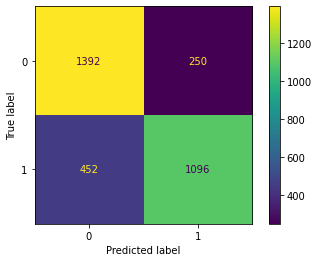

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):
                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-UNI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','NAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.8098411560058594. Accuracy: 69.96865% F1: 62.25% cohen_kappa: 0.3926
Iteration: 2000. Loss: 0.50975501537323. Accuracy: 73.22884% F1: 66.67% cohen_kappa: 0.4588
Iteration: 3000. Loss: 0.6314681172370911. Accuracy: 76.70846% F1: 74.75% cohen_kappa: 0.5324
Iteration: 4000. Loss: 0.6594074368476868. Accuracy: 75.83072% F1: 76.11% cohen_kappa: 0.5174
Iteration: 5000. Loss: 0.4238034784793854. Accuracy: 77.71160% F1: 76.88% cohen_kappa: 0.5537
Iteration: 6000. Loss: 0.49281615018844604. Accuracy: 77.74295% F1: 77.21% cohen_kappa: 0.5546
Iteration: 7000. Loss: 0.5333711504936218. Accuracy: 78.33856% F1: 77.40% cohen_kappa: 0.5661
Iteration: 8000. Loss: 0.5068711638450623. Accuracy: 76.83386% F1: 73.79% cohen_kappa: 0.5339
Uncertainity: 0.6747675


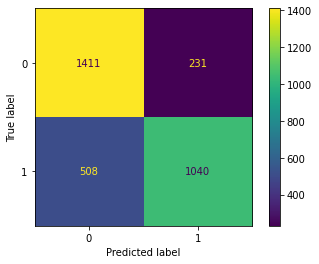

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):
                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())


                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-UNI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','RAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.45823174715042114. Accuracy: 74.98433% F1: 73.19% cohen_kappa: 0.4981
Iteration: 2000. Loss: 0.6135386228561401. Accuracy: 74.79624% F1: 76.66% cohen_kappa: 0.4987
Iteration: 3000. Loss: 0.5354475975036621. Accuracy: 76.36364% F1: 76.79% cohen_kappa: 0.5282
Iteration: 4000. Loss: 0.6827027201652527. Accuracy: 75.07837% F1: 70.08% cohen_kappa: 0.4971
Iteration: 5000. Loss: 0.45638155937194824. Accuracy: 77.46082% F1: 76.60% cohen_kappa: 0.5486
Iteration: 6000. Loss: 0.539440393447876. Accuracy: 76.64577% F1: 78.04% cohen_kappa: 0.5351
Iteration: 7000. Loss: 0.5902532339096069. Accuracy: 74.76489% F1: 77.16% cohen_kappa: 0.4988
Iteration: 8000. Loss: 0.5627497434616089. Accuracy: 76.39498% F1: 77.83% cohen_kappa: 0.5301
Uncertainity: 0.6818497


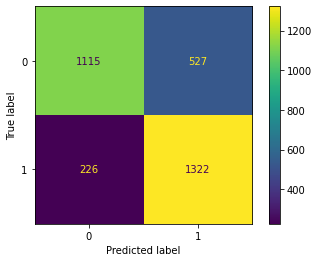

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=batch_size,
                                        shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=batch_size,
                                        shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.dropout = nn.Dropout(.1)
      self.softmax = nn.Softmax(dim=1)


  def forward(self, x):
      # set initial hidden and cell states
      # print('x size:',x.size(0))
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

      # print('before:',images.shape)

      images = images.reshape(batch_size, sequence_length, input_size).to(device)

      # print('after:',images.shape)

      labels = labels.to(device)

      # Clear gradients w.r.t. parameters
      optimizer.zero_grad()

      # Forward pass to get output/logits
      outputs = model(images.float())


      # Calculate Loss: softmax --> cross entropy loss
      loss = criterion(outputs, labels)

      # Getting gradients w.r.t. parameters
      loss.backward()

      # Updating parameters
      optimizer.step()

      iter += 1
      if iter % check_acc_iter == 0:
          # Calculate Accuracy
          correct = 0
          total = 0
          y_pred = []
          y_true = []
          pos_probs = []
          neg_probs = []
          # Iterate through test dataset
          for i_model, (images, labels) in enumerate(test_loader):

              images = images.reshape(batch_size, sequence_length, input_size).to(device)

              # Forward pass only to get logits/output
              outputs = model(images.float())

              np_output = outputs.detach().cpu().numpy()

              if i_model == 0:
                  predictions = np_output
              else:
                  predictions = np.vstack((predictions, np_output))

              pos_probs.extend(outputs[:,0].tolist())
              neg_probs.extend(outputs[:,1].tolist())

              # Get predictions from the maximum value
              _, predicted = torch.max(outputs, 1)

              # Total number of labels
              total += labels.size(0)

              y_pred.extend(predicted.tolist())
              y_true.extend(labels.tolist())



              # Total correct predictions
              if torch.cuda.is_available():
                  correct += (predicted.cpu() == labels.cpu()).sum()
              else:
                  correct += (predicted == labels).sum()

          accuracy = 100 * correct.item() / total
          f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
          cohen_kappa = cohen_kappa_score(y_true, y_pred)

          if mx_acc < accuracy:
            mx_acc = accuracy
            y_score_pos = pos_probs
            y_score_neg = neg_probs

          # Print Loss
          print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
          plt_data_imbalanced.append(('LSTM-BI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','Adam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.37631696462631226. Accuracy: 72.82132% F1: 74.73% cohen_kappa: 0.4593
Iteration: 2000. Loss: 0.7794293761253357. Accuracy: 74.85893% F1: 70.38% cohen_kappa: 0.4931
Iteration: 3000. Loss: 0.5746456980705261. Accuracy: 76.01881% F1: 77.05% cohen_kappa: 0.5221
Iteration: 4000. Loss: 0.45913928747177124. Accuracy: 75.20376% F1: 77.04% cohen_kappa: 0.5068
Iteration: 5000. Loss: 0.5549682378768921. Accuracy: 77.52351% F1: 77.95% cohen_kappa: 0.5514
Iteration: 6000. Loss: 0.39518579840660095. Accuracy: 76.86520% F1: 77.07% cohen_kappa: 0.5379
Iteration: 7000. Loss: 0.5324904322624207. Accuracy: 77.80564% F1: 77.44% cohen_kappa: 0.5561
Iteration: 8000. Loss: 0.5089000463485718. Accuracy: 77.93103% F1: 78.46% cohen_kappa: 0.5596
Uncertainity: 0.6898205


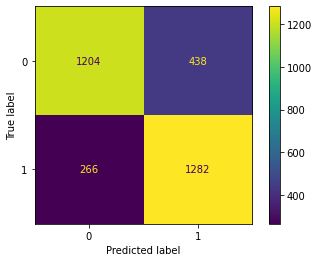

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_BI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
        # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

        self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):
                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)


            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-BI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','NAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.6293643116950989. Accuracy: 72.35110% F1: 67.45% cohen_kappa: 0.4426
Iteration: 2000. Loss: 0.5965656042098999. Accuracy: 76.14420% F1: 77.03% cohen_kappa: 0.5244
Iteration: 3000. Loss: 0.43724459409713745. Accuracy: 73.00940% F1: 75.73% cohen_kappa: 0.4642
Iteration: 4000. Loss: 0.5995762944221497. Accuracy: 77.86834% F1: 76.31% cohen_kappa: 0.5560
Iteration: 5000. Loss: 0.4284040331840515. Accuracy: 77.02194% F1: 77.67% cohen_kappa: 0.5416
Iteration: 6000. Loss: 0.5136745572090149. Accuracy: 76.61442% F1: 77.98% cohen_kappa: 0.5344
Iteration: 7000. Loss: 0.34800469875335693. Accuracy: 75.51724% F1: 77.40% cohen_kappa: 0.5132
Iteration: 8000. Loss: 0.6324380040168762. Accuracy: 74.45141% F1: 77.44% cohen_kappa: 0.4934
Uncertainity: 0.65022665


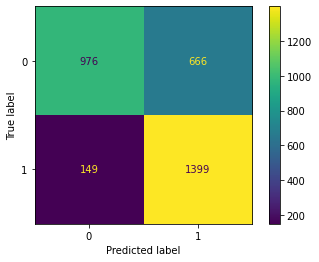

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_BI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
        # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

        self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0

            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):
                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred,zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-BI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos)
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg)

roc_auc_pos = roc_auc_score(y_true, y_score_pos)
roc_auc_neg = roc_auc_score(y_true, y_score_neg)

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','RAdam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

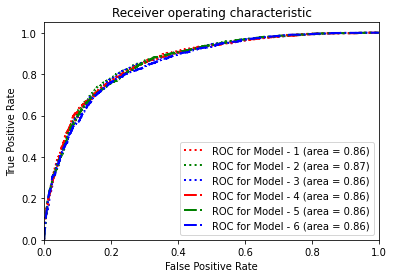

In [ ]:
# plot ROC for blanaced dataset
plt.figure()
lw = 2

colors = ['red','green','blue']

for i in range(3):
  plt.plot(
      plt_ROC_balanced[i][0],
      plt_ROC_balanced[i][1],
      color=colors[i],
      lw=lw,
      linestyle="dotted",
      label="ROC for Model - %d (area = %0.2f)" % (i+1, 1 - plt_ROC_balanced[i][2]))

for i in range(3,6):
  plt.plot(
      plt_ROC_balanced[i][0],
      plt_ROC_balanced[i][1],
      color=colors[i-3],
      lw=lw,
      linestyle="dashdot",
      label="ROC for Model - %d (area = %0.2f)" % (i+1, 1 - plt_ROC_balanced[i][2]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="best")
plt.show()

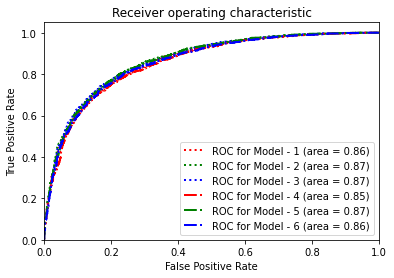

In [ ]:
# plot ROC for imblanaced dataset

plt.figure()
lw = 2
colors = ['red','green','blue']

for i in range(3):
  plt.plot(
      plt_ROC_imbalanced[i][0],
      plt_ROC_imbalanced[i][1],
      color=colors[i],
      lw=lw,
      linestyle="dotted",
      label="ROC for Model - %d (area = %0.2f)" % (i+1, 1 - plt_ROC_imbalanced[i][2]))

for i in range(3,6):
  plt.plot(
      plt_ROC_imbalanced[i][0],
      plt_ROC_imbalanced[i][1],
      color=colors[i-3],
      lw=lw,
      linestyle="dashdot",
      label="ROC for Model - %d (area = %0.2f)" % (i+1, 1 - plt_ROC_imbalanced[i][2]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="best")
plt.show()

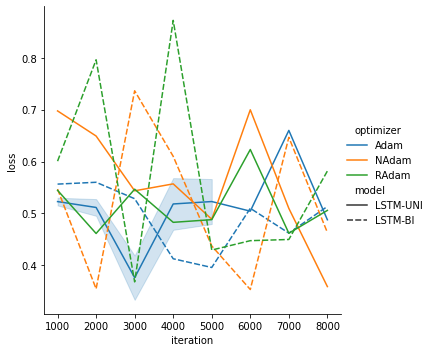

In [ ]:
# loss function plot for balanced dataset
plt_df = pd.DataFrame.from_records(
    plt_data_balanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

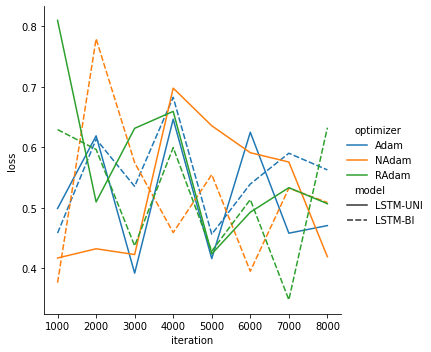

In [ ]:
# loss function plot for imbalanced dataset

plt_df = pd.DataFrame.from_records(
    plt_data_imbalanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

In [ ]:
import datetime
ct = datetime.datetime.now()
print("current time:-", ct)

current time:- 2023-03-06 04:29:33.185971
